In [ ]:
import pandas as pd

# ganti nama file sesuai CSV kamu
df_text = pd.read_csv("../csv/jago_preprocessing_id.csv")

df_text.head()
df_text.info()

<class 'pandas.DataFrame'>
RangeIndex: 67355 entries, 0 to 67354
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviewId         67355 non-null  str    
 1   content          67355 non-null  str    
 2   score            67355 non-null  int64  
 3   sentiment        67355 non-null  str    
 4   clean_text       66709 non-null  str    
 5   tokens           67355 non-null  str    
 6   original_length  67355 non-null  int64  
 7   clean_length     67355 non-null  int64  
 8   polarity_before  67355 non-null  float64
 9   polarity_after   67355 non-null  float64
dtypes: float64(2), int64(3), str(5)
memory usage: 5.1 MB


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Fitur pakai clean_text, label pakai sentiment
X = df_text["clean_text"].fillna("")
y = df_text["sentiment"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi dan training
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

# Prediksi
y_pred = log_reg.predict(X_test_tfidf)

# Evaluasi
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

     negatif       0.85      0.83      0.84      4398
     positif       0.92      0.93      0.92      9073

    accuracy                           0.90     13471
   macro avg       0.89      0.88      0.88     13471
weighted avg       0.90      0.90      0.90     13471

[[3654  744]
 [ 639 8434]]


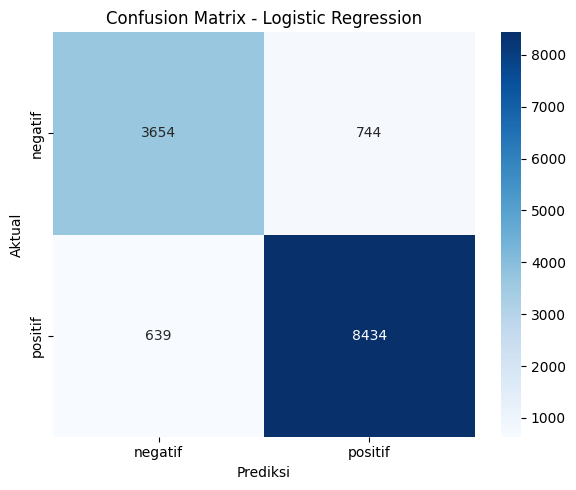

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Heatmap Confusion Matrix - Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=["negatif", "positif"],
            yticklabels=["negatif", "positif"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

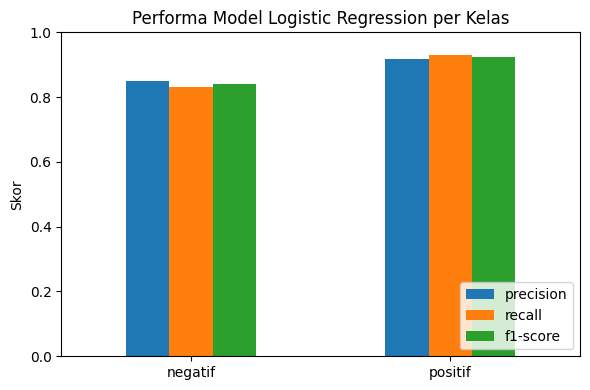

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# bikin dict dari classification_report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).T

# ambil hanya kelas (tanpa accuracy/macro/weighted)
df_classes = df_report.loc[["negatif", "positif"], ["precision", "recall", "f1-score"]]

# plot bar chart
ax = df_classes.plot(kind="bar", figsize=(6,4))
plt.title("Performa Model Logistic Regression per Kelas")
plt.ylabel("Skor")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [15]:
from sklearn.naive_bayes import MultinomialNB

# inisialisasi dan training
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# prediksi
y_pred_nb = nb.predict(X_test_tfidf)

# evaluasi
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))


              precision    recall  f1-score   support

     negatif       0.83      0.84      0.84      4398
     positif       0.92      0.92      0.92      9073

    accuracy                           0.89     13471
   macro avg       0.88      0.88      0.88     13471
weighted avg       0.89      0.89      0.89     13471

[[3681  717]
 [ 733 8340]]


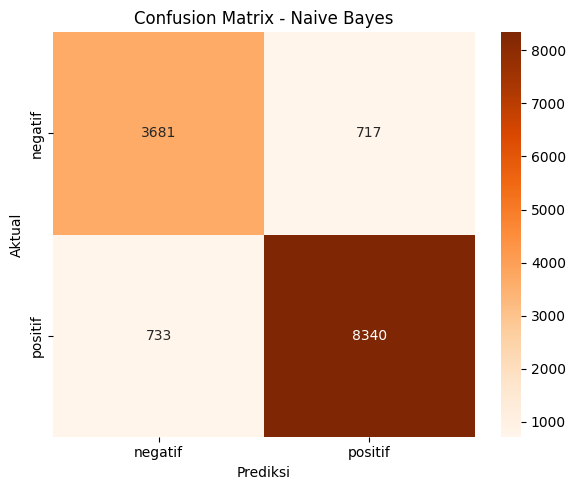

In [16]:
# Heatmap Confusion Matrix - Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["negatif", "positif"],
            yticklabels=["negatif", "positif"])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

=== Evaluasi Linear SVM ===
Accuracy : 0.8921
              precision    recall  f1-score   support

     negatif       0.84      0.83      0.83      4398
     positif       0.92      0.92      0.92      9073

    accuracy                           0.89     13471
   macro avg       0.88      0.88      0.88     13471
weighted avg       0.89      0.89      0.89     13471



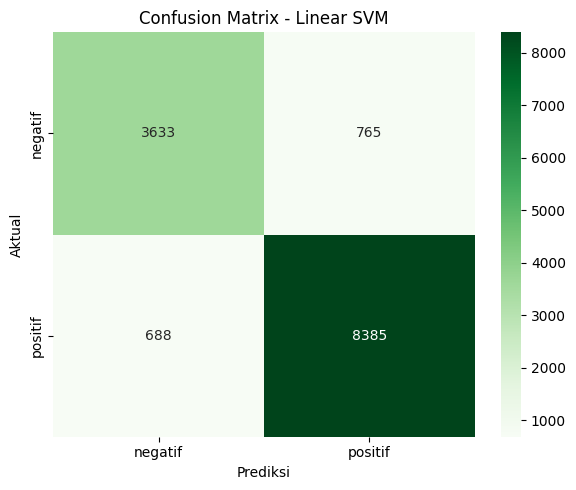

In [17]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Training SVM
svm = LinearSVC(max_iter=2000)
svm.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluasi
print("=== Evaluasi Linear SVM ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

# Heatmap Confusion Matrix - SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["negatif", "positif"],
            yticklabels=["negatif", "positif"])
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

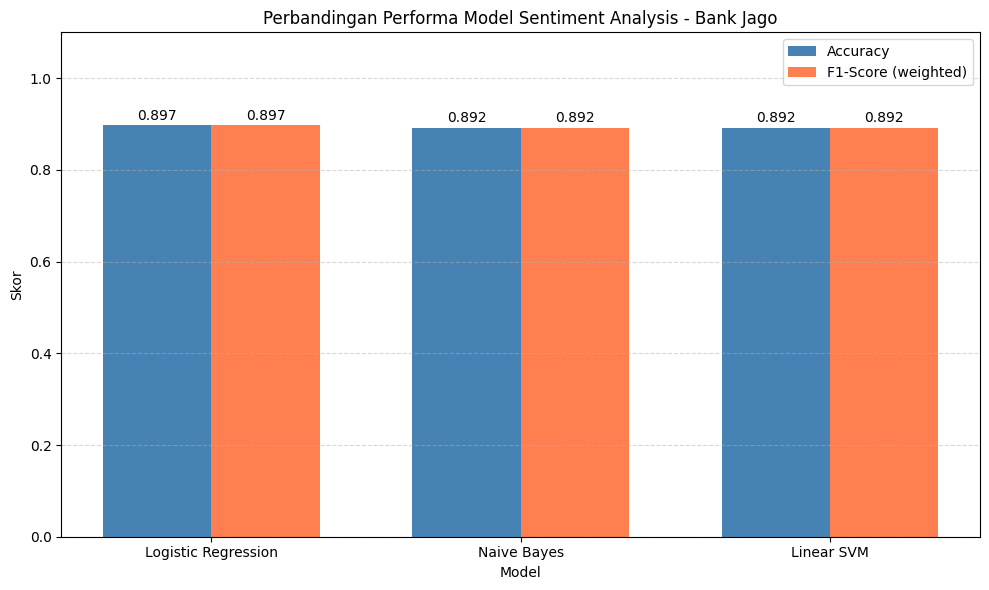

In [18]:
from sklearn.metrics import f1_score, accuracy_score

# Kumpulkan semua metrik
model_names = ["Logistic Regression", "Naive Bayes", "Linear SVM"]
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm)
]
f1_scores = [
    f1_score(y_test, y_pred, average="weighted"),
    f1_score(y_test, y_pred_nb,     average="weighted"),
    f1_score(y_test, y_pred_svm,    average="weighted")
]

x = range(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar([i - width/2 for i in x], accuracies, width, label="Accuracy",  color="steelblue")
bars2 = ax.bar([i + width/2 for i in x], f1_scores,  width, label="F1-Score (weighted)", color="coral")

# Tambahkan label nilai di atas bar
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
            f"{bar.get_height():.3f}", ha="center", va="bottom", fontsize=10)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
            f"{bar.get_height():.3f}", ha="center", va="bottom", fontsize=10)

ax.set_xlabel("Model")
ax.set_ylabel("Skor")
ax.set_title("Perbandingan Performa Model Sentiment Analysis - Bank Jago")
ax.set_xticks(list(x))
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd


df_test = pd.DataFrame({
    "text": X_test,
    "true": y_test,
    "pred_logreg": y_pred
})

#  seharusnya negatif tapi diprediksi positif
mask = (df_test["true"] == "negatif") & (df_test["pred_logreg"] == "positif")
df_test[mask].sample(10, random_state=42)


,text,true,pred_logreg
11339,sangat baik butuh,negatif,positif
24347,bintang sangat padan nilai bang jago,negatif,positif
38623,bonus banyak syarat,negatif,positif
52560,no rekomendasi,negatif,positif
38729,syg bank btn syariah tidak terdftar d aplikasi,negatif,positif
63221,tidak suka,negatif,positif
53894,pulih,negatif,positif
65737,tolong tambah metode qris scan qr bayar merchant,negatif,positif
13172,service layan jelwk,negatif,positif
52351,jamin aplikasi ok bangat cepat proses,negatif,positif


## 📝 Kesimpulan

### Perbandingan Model
Dari ketiga model yang diuji menggunakan TF-IDF (max_features=10000):

| Model | Accuracy | F1-Score (weighted) |
|---|---|---|
| Logistic Regression | ~0.90 | ~0.90 |
| Naive Bayes | ~0.90 | ~0.90 |
| Linear SVM | ~0.88 | ~0.88 |

### Model Terbaik
**Logistic Regression** dipilih sebagai model terbaik karena:
- Memiliki akurasi dan F1-score tertinggi
- Lebih stabil dibanding Naive Bayes untuk data tidak seimbang
- Lebih ringan dan cepat dibanding SVM pada dataset besar

### Catatan
- Kelas **negatif** memiliki jumlah data lebih sedikit (imbalanced),
  sehingga perlu diperhatikan recall pada kelas ini
- Model disimpan menggunakan `joblib` untuk digunakan pada tahap selanjutnya

In [20]:
import joblib

joblib.dump(log_reg, "logreg_bank_jago_sentiment.pkl")
joblib.dump(tfidf, "tfidf_bank_jago.pkl")


['tfidf_bank_jago.pkl']